# Data Visualization

In [10]:
#reading in libraries
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import chart_studio.plotly as py
import chart_studio.tools as tls #this line helps w/ embedding plotly in website 

#coding help:
# https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

In [2]:
#reading in dataset
data = pd.read_csv('mergedTS_Feb17.csv')
data = data.iloc[:, 1:]
data.head()

,unemployment,Date,consumer_sentiment,g_unemployment,g_gas,g_food_stamps,fs_households,retail_gas
0,3.4,1948-01,NaN,NaN,NaN,NaN,NaN,NaN
1,3.8,1948-02,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,1948-03,NaN,NaN,NaN,NaN,NaN,NaN
3,3.9,1948-04,NaN,NaN,NaN,NaN,NaN,NaN
4,3.5,1948-05,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Examining data types
data.dtypes

unemployment          float64
Date                   object
consumer_sentiment    float64
g_unemployment        float64
g_gas                 float64
g_food_stamps         float64
fs_households         float64
retail_gas            float64
dtype: object

In [10]:
#plotting US unemployment
#create the figure, incorporating lots of aspects of the data
fig1 = px.scatter(data, x="Date", y="unemployment", #color = 'Change',
                  #size='Volume',
                  hover_data=['unemployment'],
                  labels = {"unemployment": 'Unemployment Rate'},
                 title = 'Monthly US Unemployment [Seasonally Adjusted]')

#using annotation to highlight interesting moments: 
# https://plotly.com/python/text-and-annotations/ 
fig1.add_annotation(x='2010-01', y=10,
            text="Great Recession",
            showarrow=True,
            arrowhead=1)
fig1.add_annotation(x='2020-05', y=14,
            text="COVID-19",
            showarrow=True,
            arrowhead=1)

fig1.add_annotation(x='1982-12', y=10.3,
            text="Recession due to oil price spike",
            showarrow=True,
            arrowhead=1)

fig1.add_annotation(x='1975-04', y=9,
            text="Stagflation Recession",
            showarrow=True,
            arrowhead=1)

fig1.add_annotation(x='1958-07', y=7.5,
            text="Eisenhower Recession",
            showarrow=True,
            arrowhead=1)

fig1.update_xaxes(rangeslider_visible=True)
pio.write_html(fig1, file='Unemploy.html', auto_open=True)

# https://chart-studio.plotly.com/~ValBryant
py.plot(fig1, filename='unemploy_test', auto_open=False)
fig1.show()
# https://en.wikipedia.org/wiki/Early_1980s_recession 
# https://en.wikipedia.org/wiki/1973%E2%80%931975_recession
# https://en.wikipedia.org/wiki/Recession_of_1958

In [11]:
tls.get_embed('https://plotly.com/~ValBryant/1/') 

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~ValBryant/1.embed" height="525" width="100%"></iframe>'

In [14]:


#create the figure, incorporating lots of aspects of the data
sentiment = data.sort_values("Date").reset_index(drop=True)
sentiment = sentiment[sentiment['Date'] > '1980-01']
fig2 = px.line(sentiment, x="Date", y="consumer_sentiment", 
               labels = {"consumer_sentiment": 'Consumer Sentiment'},
               title = 'Monthly Consumer Sentiment Index')

#https://stackoverflow.com/questions/61441172/why-does-my-x-axis-ticks-are-not-sorted-properly-in-plotly-graph 

fig2.add_annotation(x='2020-04', y=68,
            text="COVID-19",
            showarrow=False,
            arrowhead=0)

fig2.add_annotation(x='2008-01', y=55,
            text="Great Recession",
            showarrow=False,
            arrowhead=0)

#using annotation to highlight interesting moments: 
# https://plotly.com/python/text-and-annotations/ 
fig2.show()
pio.write_html(fig2, file='sentiment.html', auto_open=True)


In [15]:
py.plot(fig2, filename='sentiment_test', auto_open=True)


'https://plotly.com/~ValBryant/6/'

In [16]:
tls.get_embed('https://plotly.com/~ValBryant/6/') 

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~ValBryant/6.embed" height="525" width="100%"></iframe>'

In [17]:
#create the figure, incorporating lots of aspects of the data
stamps = data[data['Date'] > '1990-01']
fig3 = px.line(stamps, x="Date", y="fs_households", 
               labels = {"fs_households": 'Households on Food Stamps'},
               title = 'US Households on Food Stamps')

#https://stackoverflow.com/questions/61441172/why-does-my-x-axis-ticks-are-not-sorted-properly-in-plotly-graph 

fig3.add_annotation(x='2019-02', y=3000000,
            text="Likely error",
            showarrow=False,
            arrowhead=0)
fig3.add_annotation(x='2008-01', y=15000000,
            text="Rise during Great Recession",
            showarrow=False,
            arrowhead=0)

#using annotation to highlight interesting moments: 
# https://plotly.com/python/text-and-annotations/ 
fig3.show()
pio.write_html(fig3, file='food_stamps.html', auto_open=False)


In [24]:
py.plot(fig3, filename='stamps_test', auto_open=True)
tls.get_embed('https://plotly.com/~ValBryant/7/') 

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~ValBryant/7.embed" height="525" width="100%"></iframe>'

In [22]:
#create the figure, incorporating lots of aspects of the data
trends = data[data['Date'] > '2003-12']
fig4 = go.Figure()

#https://plotly.com/python/line-charts/

fig4.add_trace(go.Scatter(x= trends["Date"], 
                          y = trends['g_gas'], 
                          mode = 'lines', name = 'cheap gas'))
fig4.add_trace(go.Scatter(x= trends["Date"], y = trends['g_food_stamps'], 
                          mode = 'lines', name = 'food stamps'))
fig4.add_trace(go.Scatter(x= trends["Date"], y = trends['g_unemployment'], 
                          mode = 'lines', name = 'Unemployment'))
fig4.add_annotation(x='2020-04', y=100,
            text="COVID-19",
            showarrow=False,
            arrowhead=0)
fig4.add_annotation(x='2010-01', y=20,
            text="Great Recession",
            showarrow=False,
            arrowhead=0)
fig4.add_annotation(x='2008-07', y=90,
            text="Oil at $147/ barrel in 2008",
            showarrow=False,
            arrowhead=0)
fig4.update_layout(title = 'Google Search Volumes for Economic Terms',
                  xaxis_title = 'Date, Monthly',
                  yaxis_title = 'Relative Search Volume',
                  legend_title = 'Search Term')

#using annotation to highlight interesting moments: 
# https://plotly.com/python/text-and-annotations/ 
fig4.show()
pio.write_html(fig4, file='GoogleTrends.html', auto_open=False)

# https://en.wikipedia.org/wiki/2000s_energy_crisis

In [25]:
py.plot(fig4, filename='trends_test', auto_open=True)


'https://plotly.com/~ValBryant/12/'

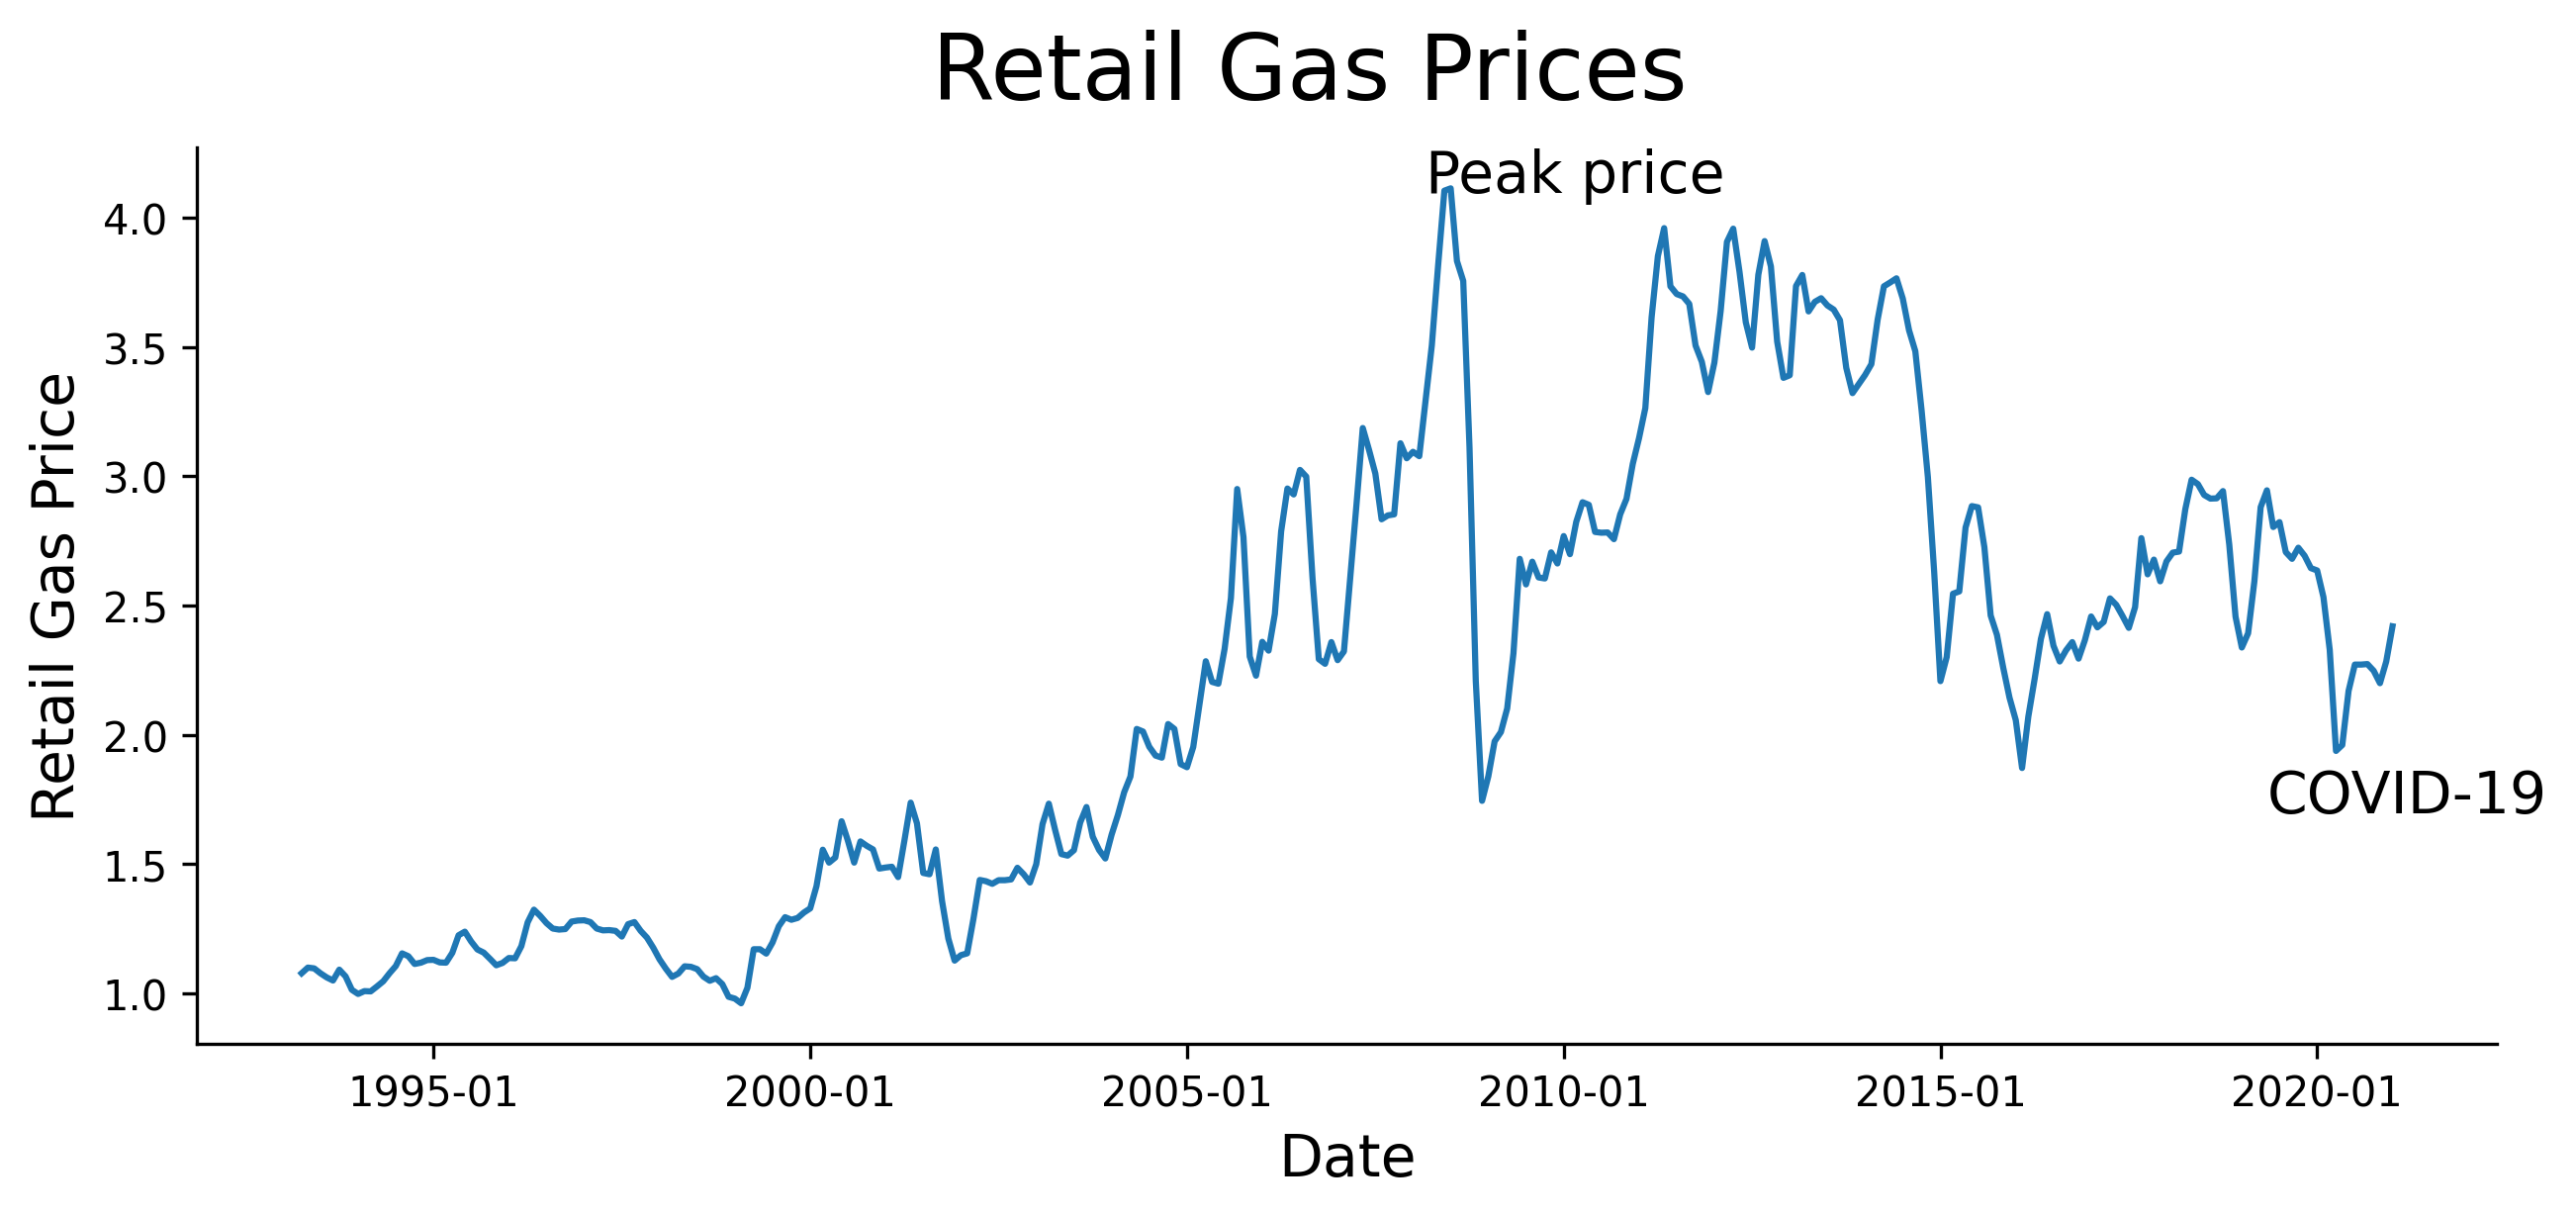

In [38]:
# https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
fig_dims = (10, 4)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # https://stackoverflow.com/questions/51937381/increase-dpi-of-matplotlib-show-in-jupyter-notebook
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x = gas['Date'], y = gas['retail_gas'], ax = ax)
plt.suptitle('Retail Gas Prices', fontsize = 22)
plt.xticks(('1995-01', '2000-01', '2005-01', '2010-01', '2015-01', '2020-01'))
plt.ylabel('Retail Gas Price', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
sns.despine()

ax.annotate(text = 'Peak price', xy = ('2008-03', 4.1), fontsize = 14)
ax.annotate(text = 'COVID-19', xy = ('2019-05', 1.7), fontsize = 14)

plt.savefig('retail_gas.png', facecolor = 'w')